# **偏鄉中小學資料分析** (PL hw1-Pandas)
41171103H 吳宜庭

## 套件使用&資料讀取

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

plt.rc('font', family='Microsoft JhengHei') #讓plt可以顯示中文

#指令 !rm /content/fileX.csv 可以刪除某路徑下的檔案(colab這裡的路徑是 /content )
#指令 !rm /content/*.csv 可以刪除路徑下的所有檔案
#指令 !pwd 可以看當前路徑

> Matplotlib官方網站 : <https://matplotlib.org/stable/plot_types/index.html>  
  
(或善用chatGPT)


In [3]:
df = pd.read_csv('111年偏鄉學校.csv', encoding='big5')
df.head()

,縣市名稱,鄉鎮市區,學生等級,學校代碼,學校名稱,公/私立,地區屬性,地址,電話,網址,班級數,學生數(總計),學生數(男),學生數(女),原住民學生比例,上學年畢業生數(總計),上學年畢業生數(男),上學年畢業生數(女)
0,[01]新北市,三峽區,國小,14630.0,市立插角國小,公立,偏遠,[237]新北市三峽區插角里插角路39號,(02)26720230,https://www.cgps.ntpc.edu.tw,6.0,91,64,27,-,-,-,-
1,[01]新北市,三峽區,國小,14631.0,市立有木國小,公立,偏遠,[237]新北市三峽區有木里131號,(02)26720067,https://www.ymps.ntpc.edu.tw,6.0,86,46,40,5.81,19,6,13
2,[01]新北市,三峽區,國小,14632.0,市立五寮國小,公立,偏遠,[237]新北市三峽區五寮里69號,(02)26720298,https://www.wres.ntpc.edu.tw,6.0,74,42,32,1.35,12,7,5
3,[01]新北市,萬里區,國小,14658.0,市立萬里國小,公立,偏遠,[207]新北市萬里區瑪鋉路18號,(02)24922034,https://www.wlps.ntpc.edu.tw,13.0,263,138,125,6.84,42,22,20
4,[01]新北市,萬里區,國小,14659.0,市立野柳國小,公立,偏遠,[207]新北市萬里區野柳里港東路167號,(02)24922512,https://www.ylps.ntpc.edu.tw,6.0,74,35,39,-,7,2,5


## Q1: 偏鄉學校分為哪些地區屬性? 分別有多少所國中小? 

In [4]:
count = df['地區屬性'].value_counts()
type_list = list(df['地區屬性'].unique())
type_list.pop() #刪除list最後一筆資料(該值為 nan )

print("經資料查找發現，台灣偏鄉學校地區屬性共分為: ",end ="")
for i in type_list:
  print(f"「{i}」", end=" ")
print(f"\n\n而本資料集總共收集了 {len(set(df['學校代碼']))} 所學校，其中各類別相應學校數分別為： ")
for i in type_list:
  print(f"{i} : {count[i]} 所")
#    print(f"{count[i]} 所有招收{i[2:]}")

經資料查找發現，台灣偏鄉學校地區屬性共分為: 「偏遠」 「特偏」 「極偏」 

而本資料集總共收集了 1140 所學校，其中各類別相應學校數分別為： 
偏遠 : 813 所
特偏 : 195 所
極偏 : 130 所


----------------
刪除不會用到的"電話"與"網址"兩行資料

In [5]:
df = df.drop(columns=['電話','網址']) 
df

,縣市名稱,鄉鎮市區,學生等級,學校代碼,學校名稱,公/私立,地區屬性,地址,班級數,學生數(總計),學生數(男),學生數(女),原住民學生比例,上學年畢業生數(總計),上學年畢業生數(男),上學年畢業生數(女)
0,[01]新北市,三峽區,國小,14630.0,市立插角國小,公立,偏遠,[237]新北市三峽區插角里插角路39號,6.0,91,64,27,-,-,-,-
1,[01]新北市,三峽區,國小,14631.0,市立有木國小,公立,偏遠,[237]新北市三峽區有木里131號,6.0,86,46,40,5.81,19,6,13
2,[01]新北市,三峽區,國小,14632.0,市立五寮國小,公立,偏遠,[237]新北市三峽區五寮里69號,6.0,74,42,32,1.35,12,7,5
3,[01]新北市,萬里區,國小,14658.0,市立萬里國小,公立,偏遠,[207]新北市萬里區瑪鋉路18號,13.0,263,138,125,6.84,42,22,20
4,[01]新北市,萬里區,國小,14659.0,市立野柳國小,公立,偏遠,[207]新北市萬里區野柳里港東路167號,6.0,74,35,39,-,7,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,[72]連江縣,北竿鄉,國中,724503.0,縣立中山國中,公立,特偏,[210]連江縣北竿鄉芹壁村84號,3.0,34,17,17,-,13,8,5
1136,[72]連江縣,莒光鄉,國中,724504.0,縣立敬恆國中(小),公立,極偏,[211]連江縣莒光鄉青帆村19號,3.0,9,5,4,22.22,8,5,3
1137,[72]連江縣,東引鄉,國中,724505.0,縣立東引國中(小),公立,極偏,[212]連江縣東引鄉中柳村94號,3.0,24,16,8,4.17,12,7,5
1138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


刪除最後兩列非數值資料  
註: **axis=1**:在 Pandas 數據結構（如 DataFrame）中，有兩個主要的軸：行（axis=0）和列（axis=1）。使用axis=1選擇在列進行刪除

In [6]:
df = df.drop(df.index[-2:])
df


,縣市名稱,鄉鎮市區,學生等級,學校代碼,學校名稱,公/私立,地區屬性,地址,班級數,學生數(總計),學生數(男),學生數(女),原住民學生比例,上學年畢業生數(總計),上學年畢業生數(男),上學年畢業生數(女)
0,[01]新北市,三峽區,國小,14630.0,市立插角國小,公立,偏遠,[237]新北市三峽區插角里插角路39號,6.0,91,64,27,-,-,-,-
1,[01]新北市,三峽區,國小,14631.0,市立有木國小,公立,偏遠,[237]新北市三峽區有木里131號,6.0,86,46,40,5.81,19,6,13
2,[01]新北市,三峽區,國小,14632.0,市立五寮國小,公立,偏遠,[237]新北市三峽區五寮里69號,6.0,74,42,32,1.35,12,7,5
3,[01]新北市,萬里區,國小,14658.0,市立萬里國小,公立,偏遠,[207]新北市萬里區瑪鋉路18號,13.0,263,138,125,6.84,42,22,20
4,[01]新北市,萬里區,國小,14659.0,市立野柳國小,公立,偏遠,[207]新北市萬里區野柳里港東路167號,6.0,74,35,39,-,7,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,[72]連江縣,南竿鄉,國中,724501.0,縣立介壽國中(小),公立,偏遠,[209]連江縣南竿鄉介壽村13號,6.0,110,63,47,3.64,26,12,14
1134,[72]連江縣,南竿鄉,國中,724502.0,縣立中正國中(小),公立,偏遠,[209]連江縣南竿鄉馬祖村4號,3.0,68,34,34,1.47,25,8,17
1135,[72]連江縣,北竿鄉,國中,724503.0,縣立中山國中,公立,特偏,[210]連江縣北竿鄉芹壁村84號,3.0,34,17,17,-,13,8,5
1136,[72]連江縣,莒光鄉,國中,724504.0,縣立敬恆國中(小),公立,極偏,[211]連江縣莒光鄉青帆村19號,3.0,9,5,4,22.22,8,5,3


## Q2: 各地區屬性學校之平均班級數為多少? 最大與最小班級數各為多少?
將偏遠命名為S1，特偏命名為S2，極偏命名為S3

In [7]:
data_S1 = df[df['地區屬性'] == '偏遠'] #把地區屬性欄位中，值為"偏遠"的資料建立為 data_S1
average_S1 = round(data_S1['班級數'].mean(),1) #選取"班級數"欄位的數值進行平均(.mean())，並四捨五入到小數點後第一位(round(number,1))
min_S1 = data_S1['班級數'].min() #班級數最小值
max_S1 = data_S1['班級數'].max() #班級數最大值

data_S2 = df[df['地區屬性'] == '特偏']
average_S2 = round(data_S2['班級數'].mean(),1)
min_S2 = data_S2['班級數'].min()
max_S2 = data_S2['班級數'].max()

data_S3 = df[df['地區屬性'] == '極偏']
average_S3 = round(data_S3['班級數'].mean(),1)
min_S3 = data_S3['班級數'].min()
max_S3 = data_S3['班級數'].max()


classAvg_list = [average_S1,average_S2,average_S3]
classMin_list = [min_S1,min_S2,min_S3]
classMax_list = [max_S1,max_S2,max_S3]
typeSorted = [data_S1,data_S2,data_S3] #順手建個照地區屬性排的資料集

classMax_list = [int(num) for num in classMax_list]
classMin_list = [int(num) for num in classMin_list]

#製作班級數資料集
data_class = {
    '地區屬性':type_list,
    '平均班級數':classAvg_list,
    '最小班級數':classMin_list,
    '最大班級數':classMax_list

}

df_class = pd.DataFrame(data_class)
df_class

,地區屬性,平均班級數,最小班級數,最大班級數
0,偏遠,7.1,1,50
1,特偏,6.0,1,25
2,極偏,5.6,3,8


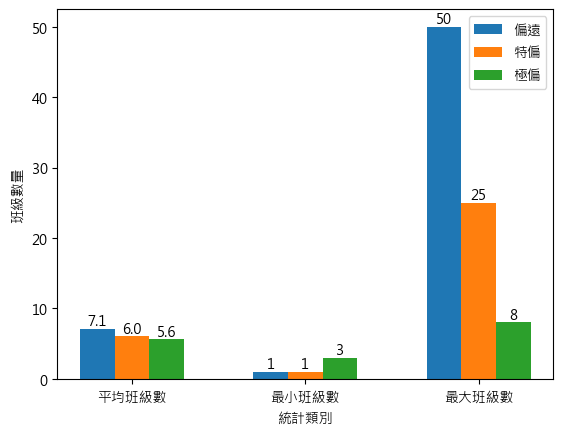

In [8]:

# 准备数据
categories = ['平均班級數', '最小班級數', '最大班級數']
bar1_S1 = df_class.loc[0][1:]
bar1_S2 = df_class.loc[1][1:]
bar1_S3 = df_class.loc[2][1:]

# 设置条形图宽度
bar_width = 0.2

# 为每个数据集生成一个位置
x = np.arange(len(categories))
x1 = x - bar_width
x2 = x
x3 = x + bar_width

# 创建并排的条形图
plt.bar(x1, bar1_S1, bar_width, label='偏遠')
plt.bar(x2, bar1_S2, bar_width, label='特偏')
plt.bar(x3, bar1_S3, bar_width, label='極偏')

# 设置 x 轴标签
plt.xticks(x, categories)

# 添加图例
plt.legend()

# 添加标签
plt.xlabel('統計類別')
plt.ylabel('班級數量')


# 在每个条形上方显示数值
for i in range(len(categories)):
    plt.text(x1[i], bar1_S1[i] + 0.5, str(bar1_S1[i]), ha='center')
    plt.text(x2[i], bar1_S2[i] + 0.5, str(bar1_S2[i]), ha='center')
    plt.text(x3[i], bar1_S3[i] + 0.5, str(bar1_S3[i]), ha='center')


# 显示图形
plt.show()


## Q3: 各地區屬性對應的原住民學生比例平均為多少?

因為資料中原住民學生比例有非數值的" -"，需要先轉換為"0"。  
且該行資料型態為字串，亦須逐筆轉換為數字型態，才能進行統計。

In [9]:

#S1
new_df1 = []
for value in data_S1['原住民學生比例']:
    if value == ' -':
        new_df1.append('0')
    else:
        new_df1.append(value)

new_df1 = [float(num_str) for num_str in new_df1]
#S2
new_df2 = []
for value in data_S2['原住民學生比例']:
    if value == ' -':
        new_df2.append('0')
    else:
        new_df2.append(value)

new_df2 = [float(num_str) for num_str in new_df2]
#S3
new_df3 = []
for value in data_S3['原住民學生比例']:
    if value == ' -':
        new_df3.append('0')
    else:
        new_df3.append(value)

new_df3 = [float(num_str) for num_str in new_df3]


#統計
indigAvg_S1 = round(sum(new_df1)/len(new_df1))
indigAvg_S2 = round(sum(new_df2)/len(new_df2))
indigAvg_S3 = round(sum(new_df3)/len(new_df3))
indigAvg_list = [indigAvg_S1,indigAvg_S2,indigAvg_S3]

data_indig = {
    '地區屬性':type_list,
    '平均原住民學生比例(%)':indigAvg_list
}

df_indig = pd.DataFrame(data_indig)
df_indig

,地區屬性,平均原住民學生比例(%)
0,偏遠,13
1,特偏,42
2,極偏,68


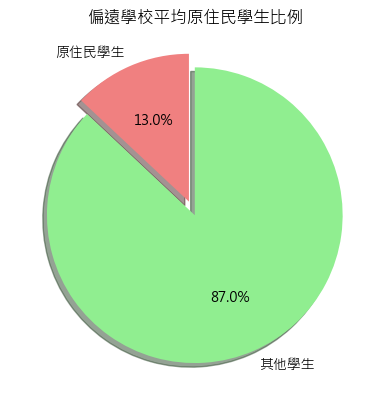

In [20]:
import matplotlib.pyplot as plt

# 准备数据
labels = ['原住民學生', '其他學生']  # 饼图的标签
sizes = [df_indig['平均原住民學生比例(%)'][0], 100 - df_indig['平均原住民學生比例(%)'][0]]  # 各部分的大小

colors = ['lightcoral', 'lightgreen']  # 饼图颜色
explode = (0.1, 0)  # 强调某一部分的偏移

# 创建圆饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# 添加标题
plt.title('偏遠學校平均原住民學生比例')

# 显示图形
plt.show()


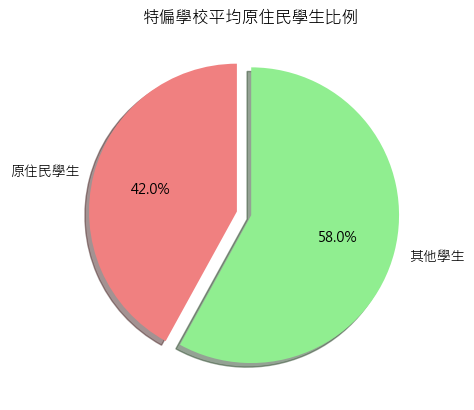

In [21]:
import matplotlib.pyplot as plt

# 准备数据
labels = ['原住民學生', '其他學生']  # 饼图的标签
sizes = [df_indig['平均原住民學生比例(%)'][1], 100 - df_indig['平均原住民學生比例(%)'][1]]  # 各部分的大小

colors = ['lightcoral', 'lightgreen']  # 饼图颜色
explode = (0.1, 0)  # 强调某一部分的偏移

# 创建圆饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# 添加标题
plt.title('特偏學校平均原住民學生比例')

# 显示图形
plt.show()


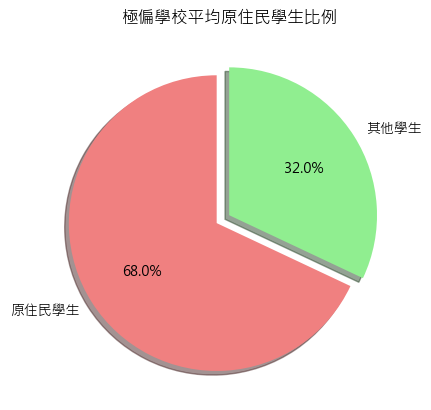

In [22]:
import matplotlib.pyplot as plt

# 准备数据
labels = ['原住民學生', '其他學生']  # 饼图的标签
sizes = [df_indig['平均原住民學生比例(%)'][2], 100 - df_indig['平均原住民學生比例(%)'][2]]  # 各部分的大小

colors = ['lightcoral', 'lightgreen']  # 饼图颜色
explode = (0.1, 0)  # 强调某一部分的偏移

# 创建圆饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# 添加标题
plt.title('極偏學校平均原住民學生比例')

# 显示图形
plt.show()


💡 本資料的其他呈現方式: 三種地區屬性的原民學生數資料合在同一張圖

> 本資料集來源: 教育部統計處>學校名錄及相關資訊  <https://depart.moe.edu.tw/ed4500/Default.aspx>  

> 後續延伸 : 資料比對 (臺灣教育長期追蹤資料庫後續調查(TEPS-B) <https://tepsb.nccu.edu.tw/>)
